In [ ]:
"""
Dataset: Spotify Music Dataset from Kaggle

    The dataset is from Spotify's API using two separate python scripts to extract popular 
    and non-popular songs and their associated audio and descriptive features. Descriptive features 
    of a song include information about the song such as the artist name, album name and release date.
    Audio features include key, valence , danceability and energy which are results of spotify's 
    audio analysis.
    
"""

In [1]:
"""
QUESTION:
            CAN A SONG'S POPULARITY BE PREDICTED USING SPOTIFY AUDIO FEATURES ALONE?

"""

"\nQUESTION:\n            CAN A SONG'S POPULARITY BE PREDICTED USING SPOTIFY AUDIO FEATURES ALONE?\n\n"

In [ ]:
"""

Machine learning model: 
    Linear Regression 
    Regularized Regressio(Ridge/Lasso) 
    Random Forst Regressor
    Gradient Boosting
    
"""

In [45]:
#Load the dataset 

import pandas as pd 

high_pop = pd.read_csv("/Users/exequielfleitas/data/high_popularity_spotify_data.csv")
low_pop = pd.read_csv("/Users/exequielfleitas/data/low_popularity_spotify_data.csv")

high_pop["pop_group"] = 1
low_pop["pop_group"] = 0

songs = pd.concat([high_pop, low_pop], ignore_index = True)

songs.shape, high_pop.shape, low_pop.shape

((4831, 30), (1686, 30), (3145, 30))

In [47]:
songs.head()
songs.info()

songs.isna().sum().sort_values(ascending=False).head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    4830 non-null   float64
 1   tempo                     4830 non-null   float64
 2   danceability              4830 non-null   float64
 3   playlist_genre            4831 non-null   object 
 4   loudness                  4830 non-null   float64
 5   liveness                  4830 non-null   float64
 6   valence                   4830 non-null   float64
 7   track_artist              4831 non-null   object 
 8   time_signature            4830 non-null   float64
 9   speechiness               4830 non-null   float64
 10  track_popularity          4831 non-null   int64  
 11  track_href                4830 non-null   object 
 12  uri                       4830 non-null   object 
 13  track_album_name          4830 non-null   object 
 14  playlist

energy              1
uri                 1
type                1
id                  1
acousticness        1
duration_ms         1
key                 1
mode                1
instrumentalness    1
tempo               1
track_album_name    1
analysis_url        1
track_href          1
valence             1
speechiness         1
danceability        1
time_signature      1
loudness            1
liveness            1
playlist_id         0
dtype: int64

In [49]:
songs["track_id"].nunique(), len(songs)

(4495, 4831)

In [51]:
# Define features & target varibales 

audio_features = [ 
    "energy", "tempo", "danceability", "loudness", "liveness", "valence",
    "speechiness", "instrumentalness", "mode", "key", "duration_ms", "acousticness"
]

X = songs[audio_features]
y = songs["track_popularity"]

print("Total NaNs in X:", X.isna().sum().sum())
print("NaNs per column:\n", X.isna().sum()[X.isna().sum() > 0])

Total NaNs in X: 12
NaNs per column:
 energy              1
tempo               1
danceability        1
loudness            1
liveness            1
valence             1
speechiness         1
instrumentalness    1
mode                1
key                 1
duration_ms         1
acousticness        1
dtype: int64


In [54]:
# Predict the mean (baseline)

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

baseline_pred = np.full(len(y_test), y_train.mean())

baseline_rmse = mean_squared_error(y_test, baseline_pred, squared=False)
baseline_r2 = r2_score(y_test, baseline_pred)

print("=" * 45)
print("Model: Baseline (Mean Predictor)")
print(f"RMSE: {baseline_rmse:.3f}")
print(f"R²:   {baseline_r2:.3f}")


Model: Baseline (Mean Predictor)
RMSE: 19.562
R²:   -0.003


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [56]:
#Linear Regression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

lr = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

rmse_lr = mean_squared_error(y_test, pred_lr, squared=False)
r2_lr = r2_score(y_test, pred_lr)

print("=" * 45)
print("Model: Linear Regression")
print(f"RMSE: {rmse_lr:.3f}")
print(f"R²:   {r2_lr:.3f}")


Model: Linear Regression
RMSE: 18.672
R²:   0.086


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [58]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("model", RandomForestRegressor(
        n_estimators=500,
        random_state=42,
        n_jobs=-1
    ))
])

rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

rmse_rf = mean_squared_error(y_test, pred_rf, squared=False)
r2_rf = r2_score(y_test, pred_rf)

print("=" * 45)
print("Model: Random Forest Regressor")
print(f"RMSE: {rmse_rf:.3f}")
print(f"R²:   {r2_rf:.3f}")


Model: Random Forest Regressor
RMSE: 16.800
R²:   0.260


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [59]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("model", GradientBoostingRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])

gbr.fit(X_train, y_train)
pred_gbr = gbr.predict(X_test)

rmse_gbr = mean_squared_error(y_test, pred_gbr, squared=False)
r2_gbr = r2_score(y_test, pred_gbr)

print("=" * 45)
print("Model: Gradient Boosting Regressor")
print(f"RMSE: {rmse_gbr:.3f}")
print(f"R²:   {r2_gbr:.3f}")


Model: Gradient Boosting Regressor
RMSE: 17.670
R²:   0.181


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [60]:
# Final comparison table

results_df = pd.DataFrame({
    "Model": [
        "Baseline",
        "Linear Regression",
        "Random Forest",
        "Gradient Boosting"
    ],
    "RMSE": [
        baseline_rmse,
        rmse_lr,
        rmse_rf,
        rmse_gbr
    ],
    "R²": [
        baseline_r2,
        r2_lr,
        r2_rf,
        r2_gbr
    ]
}).sort_values("RMSE")

print("\nFinal Model Comparison:")
print(results_df.to_string(index=False))



Final Model Comparison:
            Model      RMSE        R²
    Random Forest 16.799696  0.259965
Gradient Boosting 17.669732  0.181329
Linear Regression 18.671601  0.085861
         Baseline 19.562134 -0.003418


In [65]:
"""
RMSE -> Root Mean Square Error 
    On average, how far of the model's predictions are from the true popularity score

Baseline RMSE = 19.56
    This model predicts the same number of every song
    On average it is wrong by 19.6 popularity points 

Linear Regression RMSE = 18.67
    Uses audio features but assumes straight line relationships
    Improves error by about 0.9 points over baseline RMSE 
    Meaning that audio features help, but not much linearly 

Gradient bosting RMSE = 17.67
    Captures nonlinear patterns and interactions 
    Improves error by about 1.9 points over baseline RMSE 
    Learns more about the structure than linear regression 
    
Random Forest RMSE = 16.80
    Best perfoming model
    Predictions are off by 16.8 popularity points 
    This is a meaningful imporvement for a noisy traget like popularity 
    
"""

SyntaxError: incomplete input (87064535.py, line 1)

In [69]:
"""
R² -> Coefficient of Determination
    What percentage of variability in popularity can the model explain?

Baseline R² = -0.003
    worse than predicting the mean
    Confirms that baseline has no explanatory power 

Linear Regression R² = 0.086
    Explains 8.6% of the variation in popularity 
    Audio features do matter, BUT weakly in a linear sense 
    Most popularity variation remains unexplained 
    
Gradient Boosting R² = 0.181
    Explains 18.1% of the variation
    Nonlinear relationship significantly improve performance

Random Forest R² = 0.260
    Explains 26% of the variation 
    Best overall, but still leaves about 74% unexplained

Conclusion:
    Audio features alone explain about one quarter of what makes a song popular

"""

SyntaxError: incomplete input (2313377477.py, line 1)

Random Forest Feature Importance: 
loudness            0.136292
duration_ms         0.108163
instrumentalness    0.106030
energy              0.091400
acousticness        0.087511
speechiness         0.086436
tempo               0.085089
danceability        0.085032
valence             0.084844
liveness            0.076914
key                 0.042449
mode                0.009840
dtype: float64


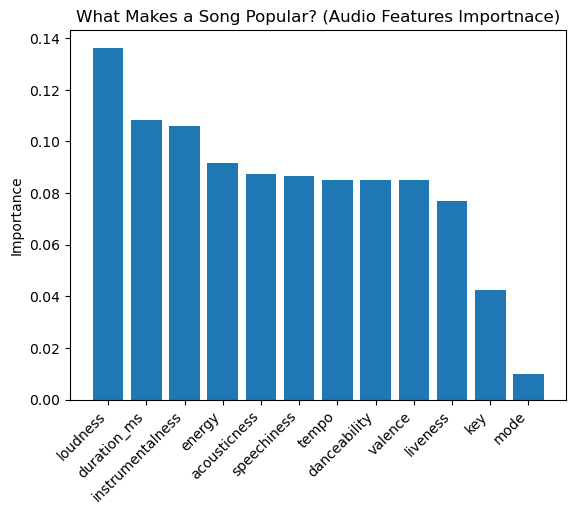

In [71]:
# Which audio characteristics matter most when predicting popularity?

import pandas as pd 
import matplotlib.pyplot as plt 

# Extract the trained Random Forest model from the pipeline 
rf_model = rf.named_steps["model"]

importances = pd.Series(
    rf_model.feature_importances_,
    index = audio_features
).sort_values(ascending = False)

print("Random Forest Feature Importance: ")
print(importances)

plt.figure()
plt.bar(importances.index, importances.values)
plt.xticks(rotation = 45, ha = "right")
plt.ylabel("Importance")
plt.title("What Makes a Song Popular? (Audio Features Importnace)")
plt.show()


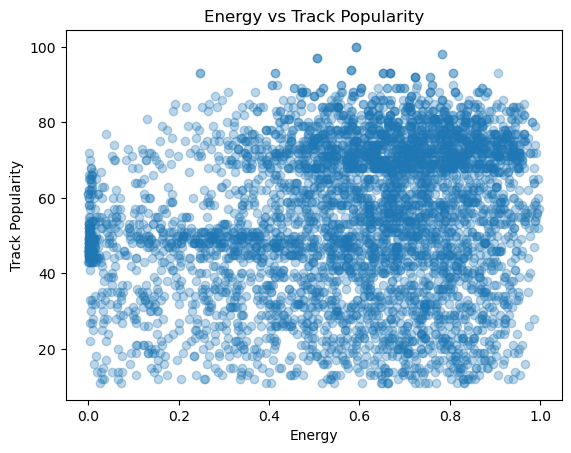

In [73]:
plt.figure()
plt.scatter(songs["energy"], songs["track_popularity"], alpha=0.3)
plt.xlabel("Energy")
plt.ylabel("Track Popularity")
plt.title("Energy vs Track Popularity")
plt.show()

In [77]:
# SHAP 
# How does each feature push a prediction higher or lower?
# Prepare the trained Random Forest for SHAP
import shap 

# Extract components
rf_model = rf.named_steps["model"]
imputer = rf.named_steps["imputer"]

# Apply imputer to full feature set
X_imputed = imputer.transform(songs[audio_features])

X_imputed = pd.DataFrame(X_imputed, columns=audio_features)

In [79]:
# Create SHAP explainer 
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_imputed)

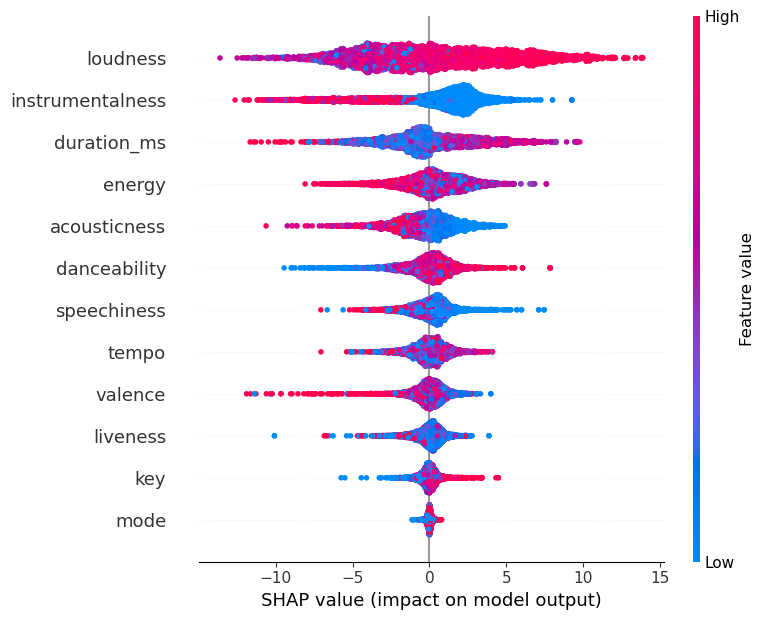

In [81]:
# SHAP Summary Plot
shap.summary_plot(
    shap_values,
    X_imputed,
    plot_type="dot",
    show=True
)

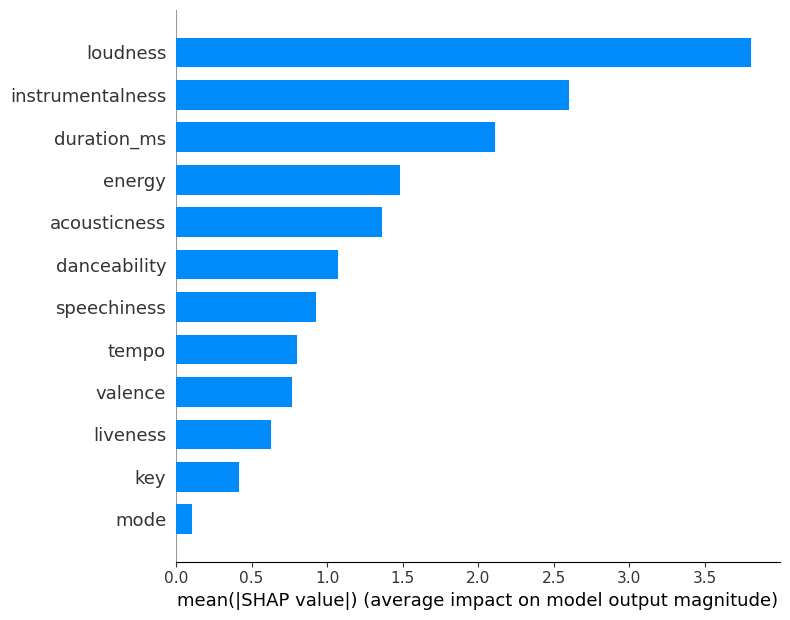

In [83]:
#SHAP Bar Plot
shap.summary_plot(
    shap_values,
    X_imputed,
    plot_type="bar",
    show=True
)

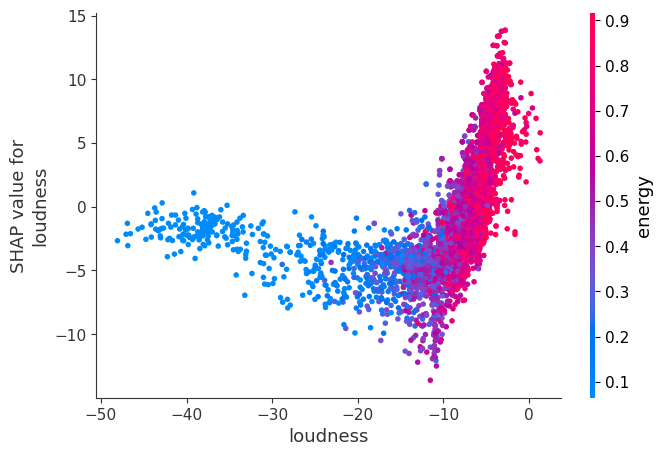

In [85]:
shap.dependence_plot(
    "loudness",
    shap_values,
    X_imputed,
    show=True
)

In [ ]:
"""
This is a SHAP dependence plot for loudness, colored by energy.

How does loudness affect predicted popularity, and how does that effect change depending on energy?

X-axis: loudness 
    Measured in decibels (dB)
    More negative = quieter
    Closer to 0 = louder
    
Y-axis: SHAP values for loudness
    This is the contribution of loudness to predicted popularity
    Positive SHAP value -> loudness is increasing predicted popularity
    Negative SHAP value -> loudness is decreasing predicted popularity
    Zero -> loudness has no effect


Answer: 
    The SHAP dependence plot shows that louder songs strongly increase predicted popularity, 
    especially when combined with high energy, while quieter tracks consistently reduce predicted 
    popularity, demonstrating a nonlinear and interactive effect between loudness and energy.

"""

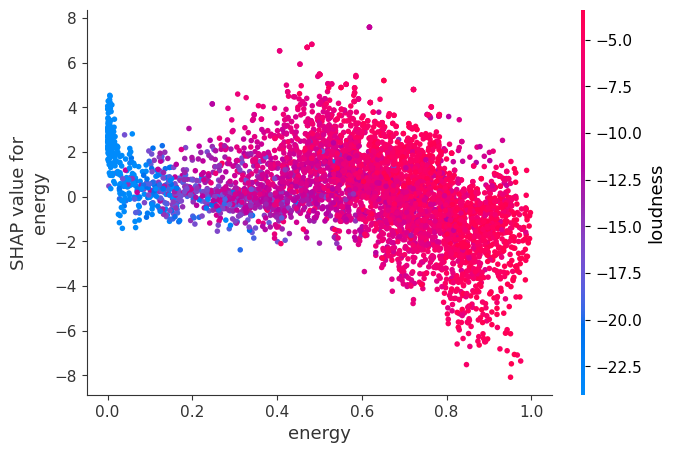

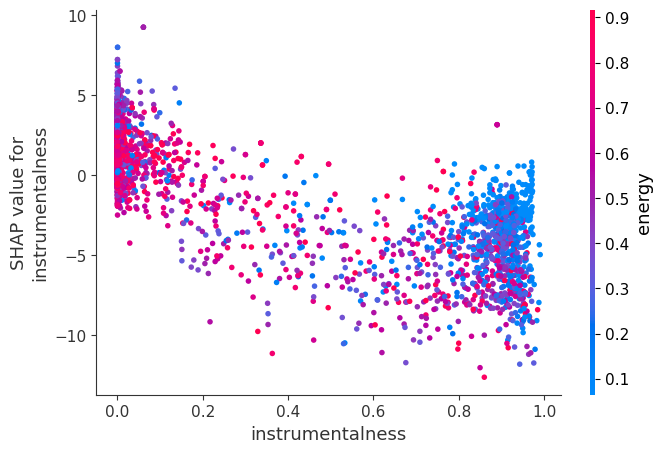

In [87]:
shap.dependence_plot("energy", shap_values, X_imputed)
shap.dependence_plot("instrumentalness", shap_values, X_imputed)

In [ ]:
"""
What does SHAP add?

SHAP adds interpretability by showing not only which features matter, but how and why they influence 
the model’s predictions. Unlike feature importance, SHAP reveals the direction, magnitude, 
and nonlinear interactions of features on predicted popularity.

SHAP explains the model’s behavior, not causation. 
It shows which patterns in the data the model relies on to make predictions.

"""

In [95]:
# Mean Comparison Table
group_means = songs.groupby("pop_group")[audio_features].mean().T
group_means.columns = ["Low Popularity", "High Popularity"]
group_means["Difference"] = group_means["High Popularity"] - group_means["Low Popularity"]

group_means.sort_values("Difference", ascending=False)

,Low Popularity,High Popularity,Difference
duration_ms,201640.174300,214562.125741,12921.951441
tempo,116.766884,121.070938,4.304053
loudness,-10.663833,-6.704131,3.959702
key,5.177163,5.338078,0.160915
energy,0.543509,0.667216,0.123707
valence,0.458438,0.525737,0.067299
danceability,0.607268,0.650362,0.043093
mode,0.553435,0.578292,0.024857
liveness,0.165487,0.171579,0.006092
speechiness,0.102174,0.100926,-0.001248


In [ ]:
"""
Final conclusion:
    Spotify audio features alone can partially predict song popularity, with loudness, energy, 
    and vocal presence playing key roles, but most of what makes a song popular lies beyond sound 
    itself.

"""